Data Exploration

In [ ]:
import numpy as np 
import pandas as pd 
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data
df = pd.read_csv('/content/drive/MyDrive/predictive_maintenance.csv')

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Conclusion: we do not have any missing values in our dataset

Understanding the columns

In [ ]:
len(df.UDI.unique())

10000

Let's have a look at unique values for each column

In [ ]:
df.apply(lambda c: len(c.unique()), axis = 0)

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

Conclusion : The columns UDI, Product ID, are unique for each observation, which means they won't have an impact on the perfs.

Therefore, we will drope them.

In [ ]:
df.drop(['UDI', 'Product ID'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


Now I want to check if Target is the same as Failure Type, if so, we should drop one of them nad keep only one as target, because, our model will overfit

A quick look:

In [ ]:
df[['Target', 'Failure Type']]

,Target,Failure Type
0,0,No Failure
1,0,No Failure
2,0,No Failure
3,0,No Failure
4,0,No Failure
...,...,...
9995,0,No Failure
9996,0,No Failure
9997,0,No Failure
9998,0,No Failure


More details:

In [ ]:
df[['Target', 'Failure Type']].value_counts()

Target  Failure Type            
0       No Failure                  9643
1       Heat Dissipation Failure     112
        Power Failure                 95
        Overstrain Failure            78
        Tool Wear Failure             45
0       Random Failures               18
1       No Failure                     9
dtype: int64

In [ ]:
df['Target'].unique()

array([0, 1])

In [ ]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

Conclusion: they are not the same, in fact after reading description of the dataset, ew notice

In [ ]:
df.loc[df['Failure Type'] == 'Power Failure', ['Target']].value_counts()

Target
1         95
dtype: int64

In [ ]:
df.loc[df['Failure Type'] == 'Overstrain Failure', ['Target']].value_counts()

Target
1         78
dtype: int64

In [ ]:
df.loc[df['Failure Type'] == 'Tool Wear Failure', ['Target']].value_counts()

Target
1         45
dtype: int64

In [ ]:
df.loc[df['Failure Type'] == 'Random Failures'].Target.replace({0:1})

1221    1
1302    1
1748    1
2072    1
2559    1
3065    1
3452    1
5471    1
5489    1
5495    1
5509    1
5553    1
5639    1
6091    1
6913    1
6960    1
7488    1
7868    1
Name: Target, dtype: int64

In [ ]:
df.loc[df['Failure Type'] == 'Random Failures', 'Target'] = 1

In [ ]:
df.loc[df['Failure Type'] == 'Random Failures'].Target

1221    1
1302    1
1748    1
2072    1
2559    1
3065    1
3452    1
5471    1
5489    1
5495    1
5509    1
5553    1
5639    1
6091    1
6913    1
6960    1
7488    1
7868    1
Name: Target, dtype: int64

In [ ]:
df.loc[df['Failure Type'] == 'No Failure', 'Target'] = 0

In [ ]:
df[['Target', 'Failure Type']].value_counts()

Target  Failure Type            
0       No Failure                  9652
1       Heat Dissipation Failure     112
        Power Failure                 95
        Overstrain Failure            78
        Tool Wear Failure             45
        Random Failures               18
dtype: int64

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


Encoding category features

In [ ]:
df.drop(['Failure Type'], inplace = True, axis = 1)

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [ ]:
encoder = LabelEncoder()

In [ ]:
df.Type = encoder.fit_transform(df.Type)

encoder.fit_

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = df.copy() # X contains the data without the target variable
y = X.pop('Target')# Y contains the target variable

In [ ]:
X = pd.DataFrame(data=scaler.fit_transform(X), columns = df.columns[:-1])

(array([[0.        , 0.0899956 , 0.53835852, 0.        , 0.26891008,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.05948862, 0.32427128, 0.30336503, 0.19111728,
         0.019022  , 0.        , 0.        , 0.        , 0.        ],
        [0.0061014 , 0.06693591, 0.28308686, 0.35397073, 0.16070002,
         0.02646929, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.01310006, 0.39398871, 0.35773924, 0.09232849,
         0.02575148, 0.00834456, 0.00287125, 0.00197398, 0.00116644],
        [0.00511441, 0.06855099, 0.27366558, 0.36958313, 0.15648288,
         0.02279051, 0.00107672, 0.        , 0.        , 0.        ],
        [0.        , 0.08362502, 0.29026497, 0.29116224, 0.22907155,
         0.00314042, 0.        , 0.        , 0.        , 0.        ]]),
 array([-3.63014947, -2.51565054, -1.40115161, -0.28665268,  0.82784625,
         1.94234518,  3.05684411,  4.17134305,  5.28584198,  6.40034091,
         7.5148398

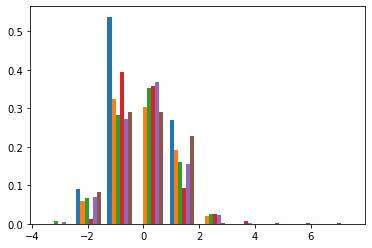

In [ ]:
#visualize the data distribution
plt.hist(X, density = True)

In [ ]:
y.value_counts()

0    9652
1     348
Name: Target, dtype: int64

Split train test

In [ ]:
#we split the data into train, test
from sklearn.model_selection import train_test_split
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8000, 6) (8000,)
Testing set shape: (2000, 6) (2000,)


### **Chosing models**

**Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

rfc = RandomForestClassifier(random_state=42)
# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Use the classifier to make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.983
Precision: 0.8604651162790697


<AxesSubplot:>

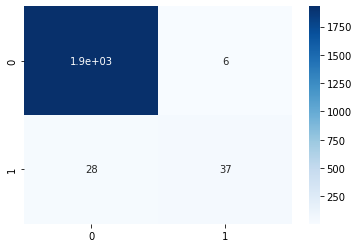

In [ ]:
#plot the heatmap for the RF classifier
import seaborn as sns
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")

SVM classifier

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf')

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = svm.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


accuracy 0.975
Precision: 0.8571428571428571


<AxesSubplot:>

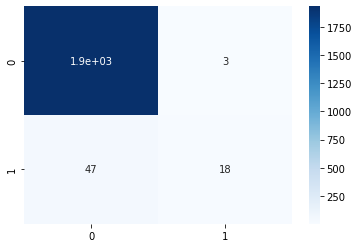

In [ ]:
#plot the heatmap for the RF classifier
import seaborn as sns
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

**Logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)

# Train the classifier on the training data
lr.fit(X_train, y_train)

# Use the classifier to make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.971
Precision: 0.64


**A deep learning network**




we insert  dropout layers of rate 50% so as to avoid the overfitting problems especially that deeplearners suffer form that

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Create a sequential model
model = Sequential()

# Add a dense layer with 64 neurons and relu activation (input layer)
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
#add a dropout layer 
model.add(Dropout(0.5))
# Add a dense layer with 32 neurons and relu activation (hidden layer)
model.add(Dense(32, activation='relu'))
# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))
# Add a dense layer with 1 neuron and sigmoid activation(output layer)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with bce loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 5 epochs
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict the labels of the test data
y_pred = model.predict(X_test)

y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('accuracy',accuracy)

Epoch 1/5
250/250 [==============================] - 6s 4ms/step - loss: 0.2722 - accuracy: 0.9381 - val_loss: 0.1566 - val_accuracy: 0.9675
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.1719 - accuracy: 0.9647 - val_loss: 0.1295 - val_accuracy: 0.9675
Epoch 3/5
250/250 [==============================] - 1s 4ms/step - loss: 0.1531 - accuracy: 0.9646 - val_loss: 0.1137 - val_accuracy: 0.9675
Epoch 4/5
250/250 [==============================] - 1s 5ms/step - loss: 0.1351 - accuracy: 0.9653 - val_loss: 0.1046 - val_accuracy: 0.9675
Epoch 5/5
63/63 [==============================] - 0s 3ms/step
accuracy 0.9695
